# COMP 4030 Assignment 7 SOLUTION


---
**Problem 1**

A network of stations and roads, which connect stations together in some way, can be represented as a graph with nodes and edges.

Run the code below, you see a network with 10 stations and 12 roads.

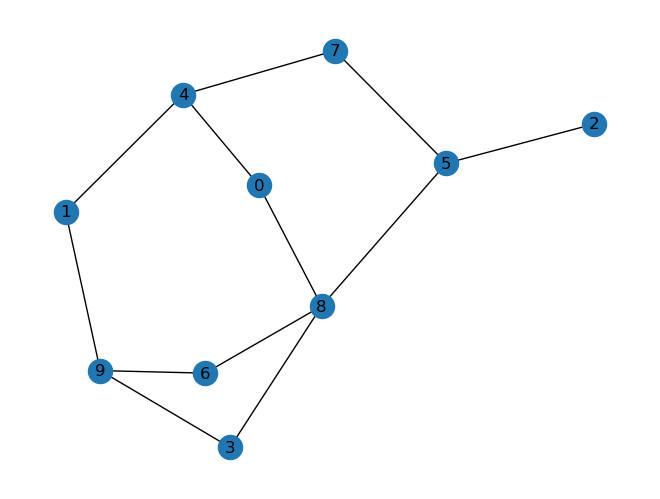

In [3]:
import networkx as nx
my_network = nx.gnp_random_graph(10, 0.25, seed=2021)
nx.draw(my_network, with_labels=True)

We are given a network (graph) with $n$ nodes or stations.

You'll write a program (called **is_valid**) that determines if a set of cameras cover all roads in a network.  If a camera is placed at node 5, for example, then all roads/edges connected to node 5 are covered.

A possible solution is a set of nodes, which is a list of $n$ boolean values.  The solution specifies which nodes or stations have cameras.  Not all solutions are *valid*.

The output is True if the cameras (specified by a solution) cover all roads (edges of the network).

For example, the solution [True,True,True,True,True,True,True,True,True,True] means that each station has a camera.  These cameras cover all roads. If this solution is the input, the output is True.

This solution [True,False,False,True,True,True,False,False,True,True] means that a camera is placed at eah of these stations: 0, 3, 4, 5, 8, 9.   These cameras cover all roads.  If this solution is the input, the output is True.

This solution [True,False,False,True,True,True,False,False,False,False] means that cameras are placed at nodes: 0, 3, 4, 5.   These cameras do not cover the road (1,9).  If this solution is the input, the output is False.

You must complete the function **is_valid** to check if a solution covers all roads in a network.

In [6]:
def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]==True]

def is_valid(solution, network):
    nodes = get_nodes(solution)
    for (u,v) in network.edges:
        if u not in nodes and v not in nodes:
            print((u,v), 'is not covered.')
            return False
    return True

s1 = [True,False,False,True,True,True,False,False,True,True]
s2 = [True,False,False,True,True,True,False,False,False,False]

is_valid(s2, my_network)

(1, 9) is not covered.


False

---
**Problem 2**

Complete the function **bactrack** to generate all valid solutions of cameras that cover a network.  

Note: review assignment 6 to define a backtracking algorithm that includes an is_valid function.


In [1]:
def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]==True]

def is_valid(solution, network):
    nodes = get_nodes(solution)
    for (a,b) in network.edges:
        if a not in nodes and b not in nodes:
            return False
    return True

def backtrack(solution, i, network):
    if i==len(solution):
        if is_valid(solution, network):
            nodes = get_nodes(solution)
            print(nodes)
    else:
        for p in [True,False]:
            solution[i] = p
            backtrack(solution, i+1, network)


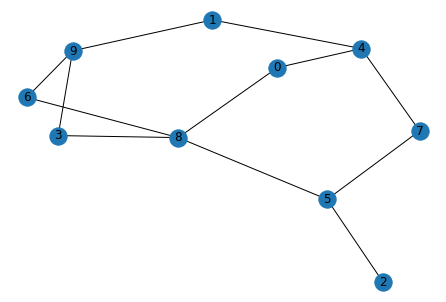

In [2]:
import networkx as nx
my_network = nx.gnp_random_graph(10, 0.25, seed=2021)
nx.draw(my_network, with_labels=True)

In [4]:
backtrack([None]*len(my_network), 0, my_network)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 9]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 8]
[0, 1, 2, 3, 4, 5, 6, 9]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 8, 9]
[0, 1, 2, 3, 4, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 6, 7, 8]
[0, 1, 2, 3, 4, 7, 8, 9]
[0, 1, 2, 3, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 5, 6, 7, 8]
[0, 1, 2, 3, 5, 6, 7, 9]
[0, 1, 2, 3, 5, 6, 7]
[0, 1, 2, 3, 5, 7, 8, 9]
[0, 1, 2, 3, 6, 7, 8, 9]
[0, 1, 2, 3, 6, 7, 8]
[0, 1, 2, 3, 7, 8, 9]
[0, 1, 2, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 4, 5, 6, 8, 9]
[0, 1, 2, 4, 5, 7, 8, 9]
[0, 1, 2, 4, 5, 8, 9]
[0, 1, 2, 4, 6, 7, 8, 9]
[0, 1, 2, 4, 7, 8, 9]
[0, 1, 2, 5, 6, 7, 8, 9]
[0, 1, 2, 5, 7, 8, 9]
[0, 1, 2, 6, 7, 8, 9]
[0, 1, 2, 7, 8, 9]
[0, 1, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 3, 4, 5, 6, 7, 8]
[0, 1, 3, 4, 5, 6, 7, 9]
[0, 1, 3, 4, 5, 6, 7]
[0, 1, 3, 4, 5, 6, 8, 9]
[0, 1, 3, 4, 5, 6, 8]
[0, 1, 3, 4, 5, 6, 9]
[0, 1, 3, 4, 5, 6]
[0, 1, 3, 4, 5, 7, 8, 9]
[0, 1, 3, 4, 5,

---
**Problem 3**

In this problem, you will revise the program in Problem 2, to find a solution that uses a minimum number of cameras.  You do this by keeping track of an optimal_configuration as you generate all valid configurations.

Note: review assignment 6

In [11]:
def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]==True]

def is_valid(solution, network):
    nodes = get_nodes(solution)
    for (u,v) in network.edges:
        if u not in nodes and v not in nodes:
            return False
    return True
#
# True if s1 has fewer cameras than s2
#
def fewer_cameras(s1, s2):
    return len(get_nodes(s1)) < len(get_nodes(s2))

def backtrack(solution, i, network, best):
    if i==len(solution):
        if is_valid(solution, network):
            if fewer_cameras(solution, best):
                for j in range(len(solution)):
                    best[j] = solution[j]
                print('updated best solution', get_nodes(best))
            nodes = get_nodes(solution)
            print(nodes)
    else:
        for p in [True,False]:
            solution[i] = p
            backtrack(solution, i+1, network, best)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
updated best solution [0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 9]
updated best solution [0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 8]
[0, 1, 2, 3, 4, 5, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 7, 9]
[0, 1, 2, 3, 4, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 6, 7, 8]
[0, 1, 2, 3, 4, 6, 7, 9]
updated best solution [0, 1, 2, 3, 4, 6, 7]
[0, 1, 2, 3, 4, 6, 7]
[0, 1, 2, 3, 4, 6, 8, 9]
[0, 1, 2, 3, 4, 6, 8]
[0, 1, 2, 3, 4, 7, 8, 9]
[0, 1, 2, 3, 4, 7, 9]
[0, 1, 2, 3, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 5, 6, 7, 8]
[0, 1, 2, 3, 5, 6, 8, 9]
[0, 1, 2, 3, 5, 6, 8]
[0, 1, 2, 3, 5, 7, 8, 9]
[0, 1, 2, 3, 6, 7, 8, 9]
[0, 1, 2, 3, 6, 7, 8]
[0, 1, 2, 3, 6, 8, 9]
updated best solution [0, 1, 2, 3, 6, 8]
[0, 1, 2, 3, 6, 8]
[0, 1, 2, 3, 7, 8, 9]
[0, 1, 2, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 4, 5, 6, 7, 8]
[0, 1, 2, 4, 5, 6, 7, 9]
[0, 1, 2, 4, 5, 6, 7]
[0, 1, 2, 4, 5, 7, 8, 9]
[0, 1, 2, 4, 5, 7, 9]
[0, 1, 2, 5, 6, 7, 8, 9]

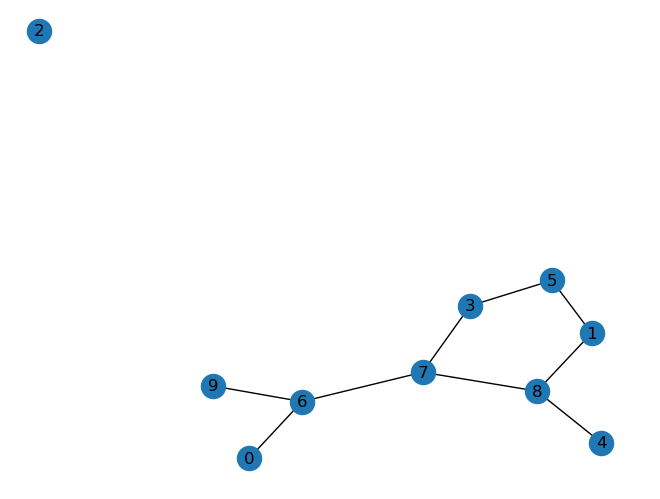

In [14]:
import networkx as nx
my_network = nx.gnp_random_graph(10, 0.25, seed=320)
nx.draw(my_network, with_labels=True)

best = [True]*len(my_network)
backtrack([None]*len(my_network), 0, my_network, best)
print('best solution:', get_nodes(best))

---
**Problem 4**

In this problem, you will add a to find a function **is_promising** to the backtracking algorithm that find the minimum number of cameras.  This function compares the current solution to the currently best solution, and if the current solution is worse, the backtracking algorithm does not expand that solution further.


NOTE:
+ On line 32, both orders [True, False] and [False, True] are correct. (Get full credits)

+ But [False, True] is more efficient.

In [19]:
def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]==True]

def is_valid(solution, network):
    nodes = get_nodes(solution)
    for (u,v) in network.edges:
        if u not in nodes and v not in nodes:
            return False
    return True
#
# True if s1 has fewer cameras than s2
#
def fewer_cameras(s1, s2):
    return len(get_nodes(s1)) < len(get_nodes(s2))

def is_promising(cur_sol, best):
    return len(get_nodes(cur_sol)) <= len(get_nodes(best))

def backtrack(solution, i, network, best):
    if i==len(solution):
        if is_valid(solution, network):
            if fewer_cameras(solution, best):
                for j in range(len(solution)):
                    best[j] = solution[j]
                print('updated best solution', get_nodes(best))
            cameras = get_nodes(solution)
            print(cameras)
    elif is_promising(solution[0:i+1], best):
        for p in [True,False]:
            solution[i] = p
            backtrack(solution, i+1, network, best)
    else:
        print('Skip at level', i)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
updated best solution [0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 9]
updated best solution [0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 8]
[0, 1, 2, 3, 4, 5, 6, 9]
updated best solution [0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
Skip at level 9
[0, 1, 2, 3, 4, 5, 7, 9]
[0, 1, 2, 3, 4, 5, 7]
[0, 1, 2, 3, 4, 5, 8, 9]
[0, 1, 2, 3, 4, 5, 8]
[0, 1, 2, 3, 4, 5, 9]
updated best solution [0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
Skip at level 8
Skip at level 9
Skip at level 9
[0, 1, 2, 3, 4, 8, 9]
[0, 1, 2, 3, 4, 8]
Skip at level 8
Skip at level 9
[0, 1, 2, 3, 5, 6, 9]
Skip at level 9
[0, 1, 2, 3, 5, 7, 9]
[0, 1, 2, 3, 5, 8, 9]
[0, 1, 2, 3, 5, 9]
Skip at level 9
[0, 1, 2, 3, 6, 8, 9]
[0, 1, 2, 3, 7, 8, 9]
[0, 1, 2, 3, 8, 9]
Skip at level 8
Skip at level 9
[0, 1, 2, 4, 5, 6, 9]
[0, 1, 2, 4, 5, 6]
Skip at level 9
[0, 1, 2, 4, 5, 7, 9]
[0, 1, 2, 4, 5, 7]
[0, 1, 2, 4, 5, 8, 9]
[0

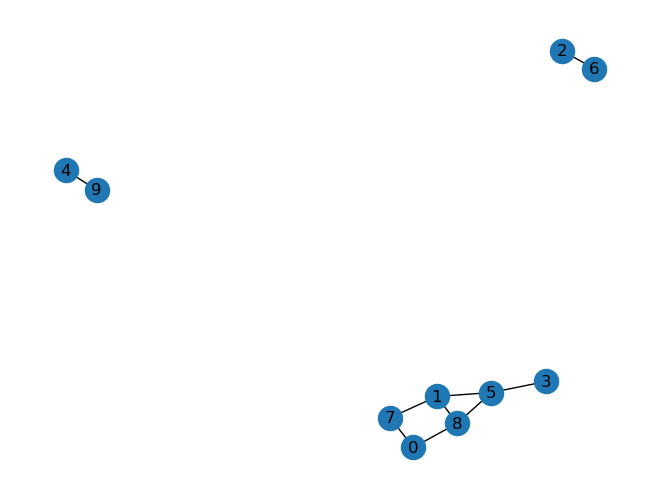

In [20]:
import networkx as nx
my_network = nx.gnp_random_graph(10, 0.25, seed=2023)
nx.draw(my_network, with_labels=True)

best = [True]*len(my_network)
backtrack([None]*len(my_network), 0, my_network,best)
print('best solution:', get_nodes(best))

### Additional note

The order in which you consider "possibilities" at each level i makes a difference in efficiency.

In [34]:
def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]==True]

def is_valid(solution, network):
    nodes = get_nodes(solution)
    for (u,v) in network.edges:
        if u not in nodes and v not in nodes:
            return False
    return True
#
# True if s1 has fewer cameras than s2
#
def fewer_cameras(s1, s2):
    return len(get_nodes(s1)) < len(get_nodes(s2))

def is_promising(cur_sol, best):
    return len(get_nodes(cur_sol)) <= len(get_nodes(best))

def backtrack(solution, i, network, best, possibilities):
    if i==len(solution):
        if is_valid(solution, network):
            if fewer_cameras(solution, best):
                for j in range(len(solution)):
                    best[j] = solution[j]
                print('updated best solution', get_nodes(best))
            cameras = get_nodes(solution)
            print(cameras)
    elif is_promising(solution[0:i+1], best):
        for p in possibilities:
            solution[i] = p
            backtrack(solution, i+1, network, best, possibilities)


updated best solution [4, 5, 7, 8]
[4, 5, 7, 8]
[4, 5, 7, 8, 9]
best solution: [4, 5, 7, 8]


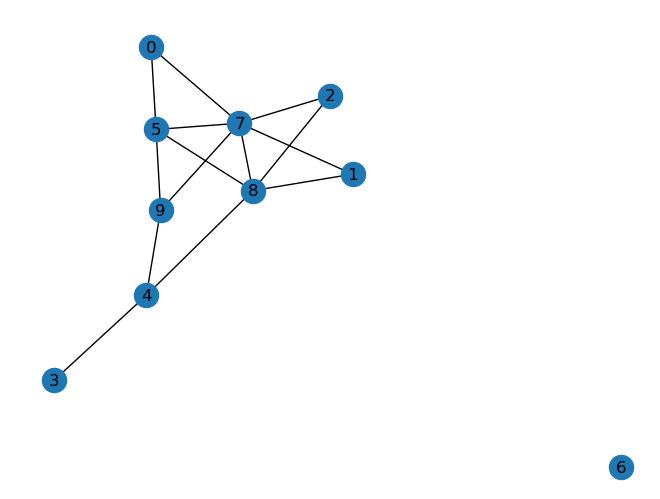

In [40]:
import networkx as nx
my_network = nx.gnp_random_graph(10, 0.25, seed=437204783920)
nx.draw(my_network, with_labels=True)

best = [True]*len(my_network)
backtrack([None]*len(my_network), 0, my_network,best, [False,True])
print('best solution:', get_nodes(best))